In [6]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [7]:
# reading data
df = pd.read_csv('../data/fico/fico.csv')

# print number of columns
print("N OF COLUMNS:",len(df.columns))

# print number of rows
print("N OF LINES",len(df.index))
df.head()

N OF COLUMNS: 24
N OF LINES 10459


,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,RiskPerformance
0,55,144,4,84,20,3,0,83,2,3,...,0,0,0,33,-8,8,1,1,69,1
1,61,58,15,41,2,4,4,100,-7,0,...,0,0,0,0,-8,0,-8,-8,0,1
2,67,66,5,24,9,0,0,100,-7,7,...,0,4,4,53,66,4,2,1,86,1
3,66,169,1,73,28,1,1,93,76,6,...,0,5,4,72,83,6,4,3,91,1
4,81,333,27,132,12,0,0,100,-7,7,...,0,1,1,51,89,3,1,0,80,1


In [8]:
# data splitting
X, y = df.iloc[:,:-1].values, df.iloc[:,-1].values
h_x, h_y = df.columns[:-1], df.columns[-1]

# training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# peguei código de:
# https://www.datacamp.com/tutorial/random-forests-classifier-python

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_train, y_train)

best_rf = rand_search.best_estimator_
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6978967495219885

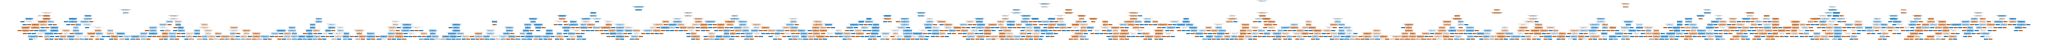

In [10]:
# visualizando uma das árvores
tree = best_rf.estimators_[0]
dot_data = export_graphviz(tree,
                            feature_names=h_x,  
                            filled=True,  
                            impurity=False, 
                            proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

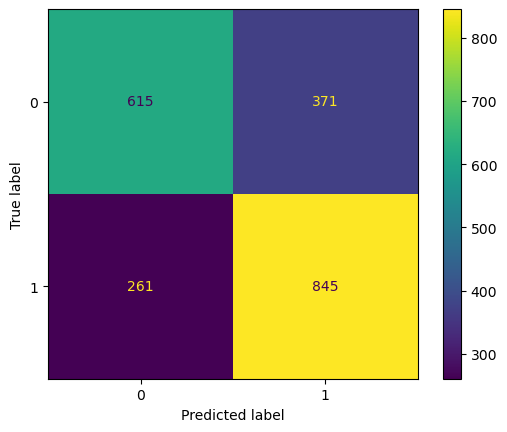

In [11]:
# matriz de confusão
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Aplicando SHAP

In [13]:
# código: https://www.kaggle.com/code/vikumsw/explaining-random-forest-model-with-shapely-values
import shap
shap.initjs()

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X)

In [ ]:
shap.summary_plot(shap_values, X)

NameError: name 'shap_values' is not defined

# Aplicando LIME